## Gradient Descent

After predicting we need to `compare` this gives us a measurement of how much a prediction is missed by

After `Compare` we `Learn`, It tells each weight how it can change to reduce the error

In [1]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight
error = (pred - goal_pred) ** 2 # Forces the raw error to be pos by mul it by itself
print(error)

0.30250000000000005


### Simple form of making neural network learn

we use `Hot and Cold Learning` it means wiggling the weights to see which direction reduces the error the most, moving the weights in that direction, and repeating until the error gets to 0.

In [10]:
weight = 0.1
lr = 0.1

def neural_network(input, weight):
    pred = input * weight
    return pred

number_of_toes = [8.5]
win_or_loss_binary = [1]

input = number_of_toes[0]
true = win_or_loss_binary[0]

pred = neural_network(input, weight)
p_up = neural_network(input, weight - lr)

error = (pred - true) ** 2
e_up = (p_up - true) ** 2
print(round(e_up, 4))

1.0


### Breaking Gradient Descent

In [14]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(5):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = input * delta
    weight = weight - weight_delta
    print("Error:" + str(error) + "Predictions:" + str(pred))

Error:0.30250000000000005Predictions:0.25
Error:0.17015625000000004Predictions:0.3875
Error:0.095712890625Predictions:0.49062500000000003
Error:0.05383850097656251Predictions:0.56796875
Error:0.03028415679931642Predictions:0.6259765625


### Introducing Alpha

Alpha reduces the weight update so it doesn't overshoot. How does this work
<div align='center'>
<b><i>weight = weight - derivative</b></i>
</div>

Accounting for alpha its a rather small change, Notice if alpha is small(say, 0.01), it will reduce the weight consistantly, thus preventing it from exploding

<div align='center'>
<b><i>weight = weight - (alpha * derivative)</i></b>
</div>


In [17]:
weight = 0.5
goal_pred = 0.8
input = 2
alpha = 0.1

for iteration in range(5):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    derivative = input * (pred - goal_pred)
    weight = weight - (alpha * derivative)
    
    print("Error: " + str(error) + " Prediction: " + str(pred))

Error: 0.03999999999999998 Prediction: 1.0
Error: 0.0144 Prediction: 0.92
Error: 0.005183999999999993 Prediction: 0.872
Error: 0.0018662400000000014 Prediction: 0.8432000000000001
Error: 0.0006718464000000028 Prediction: 0.8259200000000001


## Generalizing Gradient Descent

- Go through Gradients with multiple inputs
- Freezing one weight what does it do?
- Gradient descent with multiple ouputs
- Gradient descent with multiple input & outputs
- Visualizing weights values


### Gradient descent with multiple inputs

In [7]:
# Gradient descent with multiple input

def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    
    for i in range(len(a)):
        output += (a[i] * b[i])
    
    return output

def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred

weights = [0.1, 0.2, -.1]

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_loss = [1, 1, 0, 1]
true = win_or_loss[0]

input = [toes[0], wlrec[0], nfans[0]]
#pred = neural_network(input, weights)

alpha = 0.01 # learning rate

# Tracker:
errors = []
w0, w1, w2 = [], [], []

for iter in range(10):
    total_error = 0
    for i in range(len(toes)):
        
        x = [toes[i], wlrec[i], nfans[i]]
        y_true = win_or_loss[i]
        
        # Forward pass
        pred = neural_network(x, weights)
        
        # error + delta handling
        error = (pred - y_true) ** 2
        delta = pred - y_true
        total_error += error
        
        # update weights (Gradient descent)
        for j in range(len(weights)):
            weights[j] -= alpha * delta * x[j]
            
    # record per-batch
    errors.append(total_error)
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])

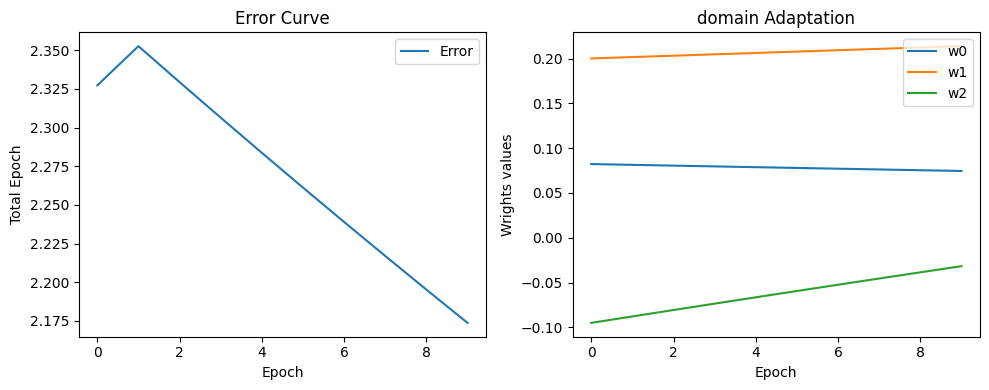

In [11]:
### Plotting the results:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# error curve
plt.subplot(1, 2, 1)
plt.plot(errors, label = "Error")
plt.xlabel("Epoch")
plt.ylabel("Total Epoch")
plt.title('Error Curve')
plt.legend()

# Weight updates
plt.subplot(1, 2, 2)
plt.plot(w0, label='w0')
plt.plot(w1, label='w1')
plt.plot(w2, label='w2')
plt.xlabel('Epoch')
plt.ylabel('Wrights values')
plt.title("domain Adaptation")
plt.legend()

# showcase them
plt.tight_layout()
plt.show()